In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

lustre_dir = "file:///lustre/scratch123/qc/"
plot_dir = "/lustre/scratch123/qc/plots/"

In [2]:
annot_tsv = lustre_dir + "annotations/sample_qc_by_pop.tsv.bgz"
df = pd.read_csv(annot_tsv, compression="gzip",sep="\t")
df.head()

,s,callrate,f_stat,is_female,assigned_pop,sample_qc,fail_heterozygosity_rate,fail_n_snp,fail_r_ti_tv,fail_r_insertion_deletion,fail_n_insertion,fail_n_deletion,fail_r_het_hom_var,qc_metrics_filters
0,EGAN00003143328,0.99999,0.83044,False,EUR,"{""call_rate"":0.9999855117608282,""n_called"":552...",False,True,False,NaN,True,True,False,"[""n_deletion"",""n_insertion"",""n_snp""]"
1,EGAN00003143329,0.99999,0.82640,False,EUR,"{""call_rate"":0.9999909448505175,""n_called"":552...",True,True,False,NaN,True,True,True,"[""heterozygosity_rate"",""n_deletion"",""r_het_hom..."
2,EGAN00003143330,0.99999,0.87485,False,AFR,"{""call_rate"":0.9999945669103105,""n_called"":552...",False,False,False,NaN,True,True,False,"[""n_deletion"",""n_insertion""]"
3,EGAN00003143331,1.00000,0.83851,False,EUR,"{""call_rate"":0.999996377940207,""n_called"":5521...",True,True,False,NaN,True,True,True,"[""heterozygosity_rate"",""n_deletion"",""r_het_hom..."
4,EGAN00003143334,0.99999,0.85063,False,EUR,"{""call_rate"":0.999992755880414,""n_called"":5521...",True,True,False,NaN,True,True,True,"[""heterozygosity_rate"",""n_deletion"",""r_het_hom..."


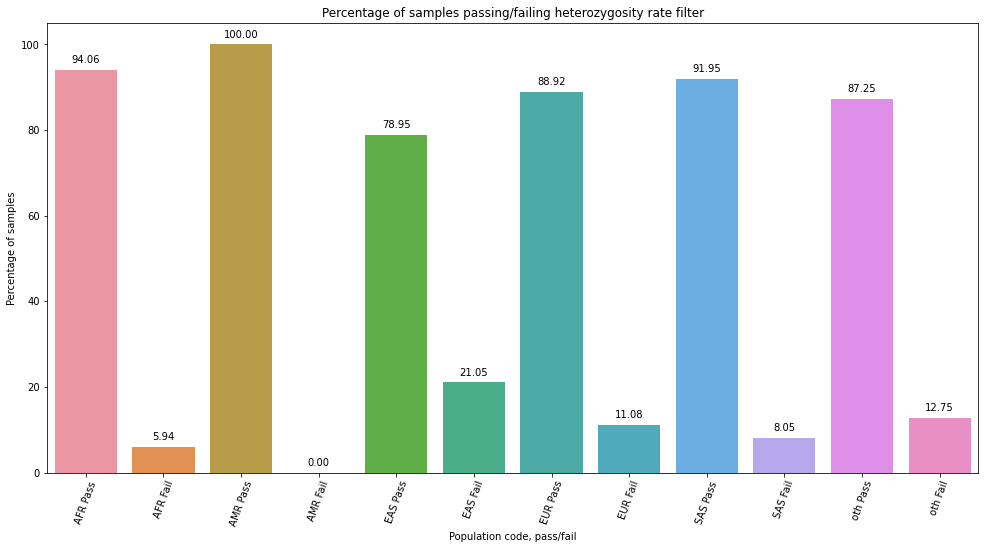

In [3]:
#prepare data for seaborn plot
#unstack fills in missing values, then convert to string for axis labels
xnames = df.groupby("assigned_pop")["fail_heterozygosity_rate"].value_counts().unstack(fill_value=0).stack().index.tolist()
xnames = [str(x).replace("'", "").replace(',', '').replace('(', '').replace(')', '').replace('False', 'Pass').replace('True', 'Fail') for x in xnames]

#values for Y - normalised counts
yvals = df.groupby("assigned_pop")["fail_heterozygosity_rate"].value_counts(normalize=True).unstack(fill_value=0).stack()*100

a4_dims = (16.69,8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=70)

ping=sns.barplot(x=xnames, y=yvals)
ax.set(xlabel='Population code, pass/fail', ylabel='Percentage of samples', title='Percentage of samples passing/failing heterozygosity rate filter')
for p in ping.patches:
    ping.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plotfile = plot_dir + "/sample_qc/heterozygosity_rate.png"
ping.figure.savefig(plotfile)

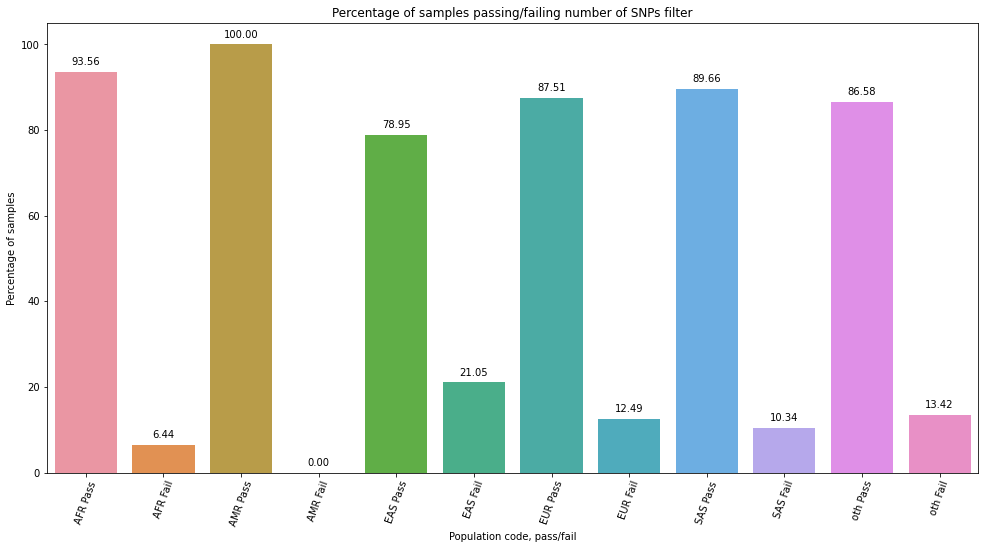

In [4]:
#prepare data for seaborn plot
#unstack fills in missing values, then convert to string for axis labels
xnames = df.groupby("assigned_pop")["fail_n_snp"].value_counts().unstack(fill_value=0).stack().index.tolist()
xnames = [str(x).replace("'", "").replace(',', '').replace('(', '').replace(')', '').replace('False', 'Pass').replace('True', 'Fail') for x in xnames]

#values for Y - normalised counts
yvals = df.groupby("assigned_pop")["fail_n_snp"].value_counts(normalize=True).unstack(fill_value=0).stack()*100

a4_dims = (16.69,8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=70)

ping=sns.barplot(x=xnames, y=yvals)
ax.set(xlabel='Population code, pass/fail', ylabel='Percentage of samples', title='Percentage of samples passing/failing number of SNPs filter')
for p in ping.patches:
    ping.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plotfile = plot_dir + "/sample_qc/num_snps.png"
ping.figure.savefig(plotfile)

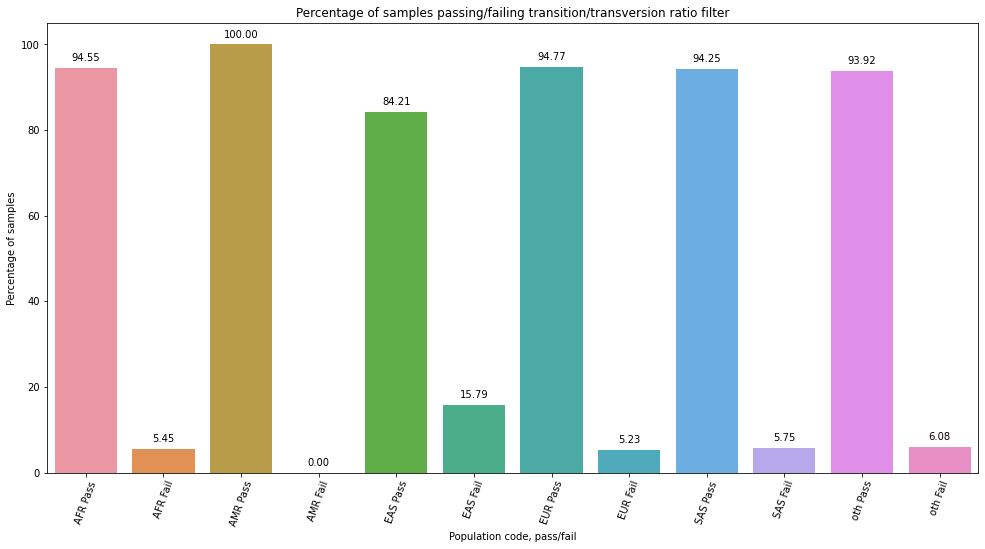

In [5]:
#prepare data for seaborn plot
#unstack fills in missing values, then convert to string for axis labels
xnames = df.groupby("assigned_pop")["fail_r_ti_tv"].value_counts().unstack(fill_value=0).stack().index.tolist()
xnames = [str(x).replace("'", "").replace(',', '').replace('(', '').replace(')', '').replace('False', 'Pass').replace('True', 'Fail') for x in xnames]

#values for Y - normalised counts
yvals = df.groupby("assigned_pop")["fail_r_ti_tv"].value_counts(normalize=True).unstack(fill_value=0).stack()*100

a4_dims = (16.69,8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=70)

ping=sns.barplot(x=xnames, y=yvals)
ax.set(xlabel='Population code, pass/fail', ylabel='Percentage of samples', title='Percentage of samples passing/failing transition/transversion ratio filter')
for p in ping.patches:
    ping.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plotfile = plot_dir + "/sample_qc/ti_tv.png"
ping.figure.savefig(plotfile)

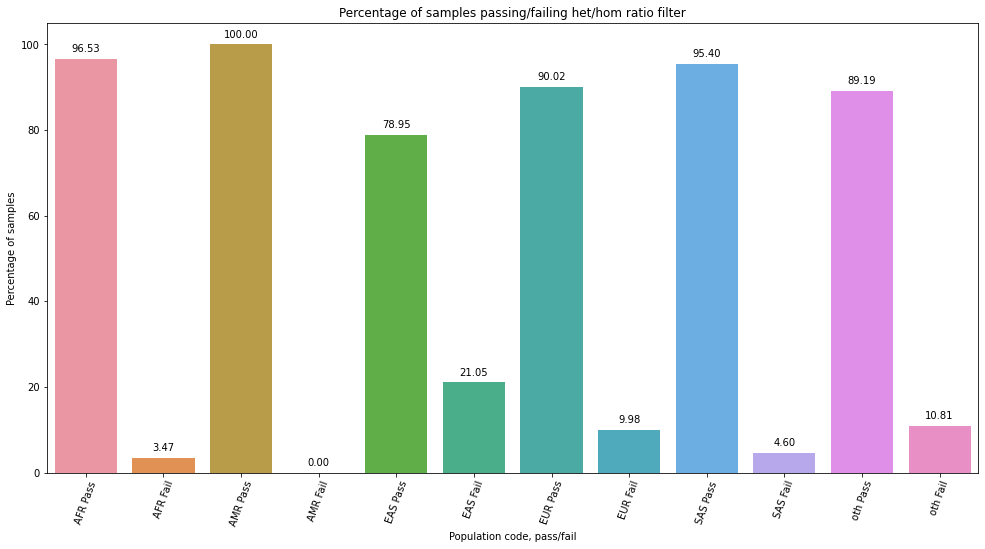

In [6]:
#prepare data for seaborn plot
#unstack fills in missing values, then convert to string for axis labels
xnames = df.groupby("assigned_pop")["fail_r_het_hom_var"].value_counts().unstack(fill_value=0).stack().index.tolist()
xnames = [str(x).replace("'", "").replace(',', '').replace('(', '').replace(')', '').replace('False', 'Pass').replace('True', 'Fail') for x in xnames]

#values for Y - normalised counts
yvals = df.groupby("assigned_pop")["fail_r_het_hom_var"].value_counts(normalize=True).unstack(fill_value=0).stack()*100

a4_dims = (16.69,8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=70)

ping=sns.barplot(x=xnames, y=yvals)
ax.set(xlabel='Population code, pass/fail', ylabel='Percentage of samples', title='Percentage of samples passing/failing het/hom ratio filter')
for p in ping.patches:
    ping.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plotfile = plot_dir + "/sample_qc/het_hom.png"
ping.figure.savefig(plotfile)

In [2]:
import hail as hl
import pyspark
from hail.plot import show
hl.plot.output_notebook()

from bokeh.plotting import output_file, save

sc = pyspark.SparkContext()
tmp_dir = "hdfs://spark-master:9820/"
lustre_dir = "file:///lustre/scratch123/qc/"
hl.init(sc=sc, tmp_dir=tmp_dir, default_reference="GRCh38")

Loading BokehJS ...

2022-03-11 14:49:37 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
pip-installed Hail requires additional configuration options in Spark referring
  to the path to the Hail Python module directory HAIL_DIR,
  e.g. /path/to/python/site-packages/hail:
    spark.jars=HAIL_DIR/backend/hail-all-spark.jar
    spark.driver.extraClassPath=HAIL_DIR/backend/hail-all-spark.jar
    spark.executor.extraClassPath=./hail-all-spark.jarRunning on Apache Spark version 3.1.2
SparkUI available at http://spark-master:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.88-7d39379870da
LOGGING: writing to /home/ubuntu/jupyter/hail-20220311-1449-0.2.88-7d39379870da.log


In [8]:
#look at non-stratified QC
ht_sample_qc_file = lustre_dir + "matrixtables/non_stratified_sample_qc_cols.ht"
ht = hl.read_table(ht_sample_qc_file)
ht.show()

+-------------------+-------------------------+--------------------------+
| s                 | sample_qc.dp_stats.mean | sample_qc.dp_stats.stdev |
+-------------------+-------------------------+--------------------------+
| str               |                 float64 |                  float64 |
+-------------------+-------------------------+--------------------------+
| "EGAN00003143328" |                2.71e+01 |                 1.66e+01 |
| "EGAN00003143329" |                2.46e+01 |                 1.49e+01 |
| "EGAN00003143330" |                2.59e+01 |                 1.51e+01 |
| "EGAN00003143331" |                2.57e+01 |                 1.60e+01 |
| "EGAN00003143334" |                2.54e+01 |                 1.47e+01 |
| "EGAN00003143336" |                2.62e+01 |                 1.56e+01 |
| "EGAN00003143337" |                2.84e+01 |                 1.75e+01 |
| "EGAN00003143338" |                2.52e+01 |                 1.53e+01 |
| "EGAN00003143339" |                2.67e+01 |                 1.57e+01 |
| "EGAN00003143340" |                2.63e+01 |                 1.54e+01 |
+-------------------+-------------------------+--------------------------+

+------------------------+------------------------+-------------------------+
| sample_qc.dp_stats.min | sample_qc.dp_stats.max | sample_qc.gq_stats.mean |
+------------------------+------------------------+-------------------------+
|                float64 |                float64 |                 float64 |
+------------------------+------------------------+-------------------------+
|               0.00e+00 |               1.35e+03 |                6.45e+01 |
|               0.00e+00 |               1.07e+03 |                5.95e+01 |
|               0.00e+00 |               1.45e+03 |                6.22e+01 |
|               0.00e+00 |               1.01e+03 |                6.15e+01 |
|               0.00e+00 |               1.01e+03 |                6.13e+01 |
|               0.00e+00 |               1.03e+03 |                6.27e+01 |
|               0.00e+00 |               1.55e+03 |                6.73e+01 |
|               0.00e+00 |               1.12e+03 |                6.08e+01 |
|               0.00e+00 |               1.17e+03 |                6.39e+01 |
|               0.00e+00 |               1.32e+03 |                6.31e+01 |
+------------------------+------------------------+-------------------------+

+--------------------------+------------------------+------------------------+
| sample_qc.gq_stats.stdev | sample_qc.gq_stats.min | sample_qc.gq_stats.max |
+--------------------------+------------------------+------------------------+
|                  float64 |                float64 |                float64 |
+--------------------------+------------------------+------------------------+
|                 3.06e+01 |               0.00e+00 |               9.90e+01 |
|                 3.13e+01 |               0.00e+00 |               9.90e+01 |
|                 3.08e+01 |               0.00e+00 |               9.90e+01 |
|                 3.14e+01 |               0.00e+00 |               9.90e+01 |
|                 3.08e+01 |               0.00e+00 |               9.90e+01 |
|                 3.07e+01 |               0.00e+00 |               9.90e+01 |
|                 2.97e+01 |               0.00e+00 |               9.90e+01 |
|                 3.10e+01 |               0.00e+00 |               9.90e+01 |
|                 3.07e+01 |               0.00e+00 |               9.90e+01 |
|                 3.06e+01 |               0.00e+00 |               9.90e+01 |
+--------------------------+------------------------+------------------------+

+---------------------+--------------------+------------------------+
| sample_qc.call_rate | sample_qc.n_called | sample_qc.n_not_called |
+---------------------+--------------------+------------------------+
|             float64 |              int64 |                  int64 |
+----

In [9]:
fail_count_expr = (hl.case()
                   .when(ht.filter_fail_count == 0, '0')
                   .when(ht.filter_fail_count == 1, '1')
                   .when(ht.filter_fail_count == 2, '2')
                   .when(ht.filter_fail_count == 3, '3')
                   .when(ht.filter_fail_count == 4, '4')
                   .default("")
                  )
ht = ht.annotate(filter_fail_count_str = fail_count_expr).key_by('s')

In [14]:
p = hl.plot.scatter(ht.sample_qc.dp_stats.mean, ht.sample_qc.call_rate, xlabel='Mean DP', ylabel='Call Rate', label=ht.filter_fail_count_str, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/DP_call_rate_fail_count.html"
output_file(plot_file)
save(p)


'/lustre/scratch123/qc/plots/sample_qc/DP_call_rate_fail_count.html'

In [15]:
p = hl.plot.scatter(ht.sample_qc.dp_stats.mean, ht.sample_qc.call_rate, xlabel='Mean DP', ylabel='Call Rate', label=ht.assigned_pop, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/DP_call_rate_pop.html"
output_file(plot_file)
save(p)

'/lustre/scratch123/qc/plots/sample_qc/DP_call_rate_pop.html'

In [16]:
ht_sample_qc_file = lustre_dir + "matrixtables/mt_pops_sampleqc.ht"
htqc = hl.read_table(ht_sample_qc_file)
htqc.show()

+-------------------+----------+----------+-----------+--------------+
| s                 | callrate |   f_stat | is_female | assigned_pop |
+-------------------+----------+----------+-----------+--------------+
| str               |  float64 |  float64 |      bool | str          |
+-------------------+----------+----------+-----------+--------------+
| "EGAN00003143328" | 1.00e+00 | 8.30e-01 |     False | "EUR"        |
| "EGAN00003143329" | 1.00e+00 | 8.26e-01 |     False | "EUR"        |
| "EGAN00003143330" | 1.00e+00 | 8.75e-01 |     False | "AFR"        |
| "EGAN00003143331" | 1.00e+00 | 8.39e-01 |     False | "EUR"        |
| "EGAN00003143334" | 1.00e+00 | 8.51e-01 |     False | "EUR"        |
| "EGAN00003143336" | 1.00e+00 | 8.81e-01 |     False | "EUR"        |
| "EGAN00003143337" | 1.00e+00 | 8.57e-01 |     False | "EUR"        |
| "EGAN00003143338" | 1.00e+00 | 8.20e-01 |     False | "EUR"        |
| "EGAN00003143339" | 1.00e+00 | 8.71e-01 |     False | "EUR"        |
| "EGAN00003143340" | 1.00e+00 | 8.57e-01 |     False | "EUR"        |
+-------------------+----------+----------+-----------+--------------+

+---------------------+--------------------+------------------------+
| sample_qc.call_rate | sample_qc.n_called | sample_qc.n_not_called |
+---------------------+--------------------+------------------------+
|             float64 |              int64 |                  int64 |
+---------------------+--------------------+------------------------+
|            1.00e+00 |             552164 |                      8 |
|            1.00e+00 |             552167 |                      5 |
|            1.00e+00 |             552169 |                      3 |
|            1.00e+00 |             552170 |                      2 |
|            1.00e+00 |             552168 |                      4 |
|            1.00e+00 |             552166 |                      6 |
|            1.00e+00 |             552172 |                      0 |
|            1.00e+00 |             552167 |                      5 |
|            1.00e+00 |             552169 |                      3 |
|            1.00e+00 |             552171 |                      1 |
+---------------------+--------------------+------------------------+

+----------------------+---------------------+-----------------+
| sample_qc.n_filtered | sample_qc.n_hom_ref | sample_qc.n_het |
+----------------------+---------------------+-----------------+
|                int64 |               int64 |           int64 |
+----------------------+---------------------+-----------------+
|                    0 |              535825 |           11111 |
|                    0 |              535303 |           11701 |
|                    0 |              534327 |           12536 |
|                    0 |              535491 |           11499 |
|                    0 |              535424 |           11588 |
|                    0 |              535584 |           11499 |
|                    0 |              536251 |           10806 |
|                    0 |              535534 |           11525 |
|                    0 |              535983 |           11019 |
|                    0 |              535620 |           11390 |
+----------------------+---------------------+-----------------+

+---------------------+---------------------+-----------------------+
| sample_qc.n_hom_var | sample_qc.n_non_ref | sample_qc.n_singleton |
+---------------------+---------------------+-----------------------+
|               int64 |               int64 |                 int64 |
+---------------------+---------------------+-----------------------+
|                5228 |               16339 |                     0 |
|                5163 |               16864 |                     0 |
|                5306 |               17842 |                     0 |
|                5180 |               16679 |                     0 |
|                5156 |               16744 |                     0 |
|

In [17]:
#convert to pandas df to do violin plots

df = htqc.to_pandas(flatten=True)
df.head()

,s,callrate,f_stat,is_female,assigned_pop,sample_qc.call_rate,sample_qc.n_called,sample_qc.n_not_called,sample_qc.n_filtered,sample_qc.n_hom_ref,...,sample_qc.n_snp,sample_qc.n_insertion,sample_qc.n_deletion,sample_qc.n_transition,sample_qc.n_transversion,sample_qc.n_star,sample_qc.r_ti_tv,sample_qc.r_het_hom_var,sample_qc.r_insertion_deletion,sample_qc.heterozygosity_rate
0,EGAN00003143328,0.999989,0.830440,False,EUR,0.999986,552164,8,0,535825,...,21567,0,0,13367,8200,0,1.630122,2.125287,NaN,0.020123
1,EGAN00003143329,0.999993,0.826403,False,EUR,0.999991,552167,5,0,535303,...,22027,0,0,13386,8641,0,1.549126,2.266318,NaN,0.021191
2,EGAN00003143330,0.999993,0.874849,False,AFR,0.999995,552169,3,0,534327,...,23148,0,0,14355,8793,0,1.632549,2.362608,NaN,0.022703
3,EGAN00003143331,0.999997,0.838514,False,EUR,0.999996,552170,2,0,535491,...,21859,0,0,13317,8542,0,1.559003,2.219884,NaN,0.020825
4,EGAN00003143334,0.999993,0.850626,False,EUR,0.999993,552168,4,0,535424,...,21900,0,0,13385,8515,0,1.571932,2.247479,NaN,0.020986


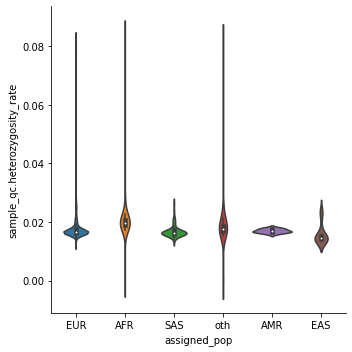

In [18]:
vio = sns.catplot(x="assigned_pop", y="sample_qc.heterozygosity_rate",
            kind="violin",
            data=df)
plotfile = plot_dir + "sample_qc/het_rate_violin.png"
vio.figure.savefig(plotfile)

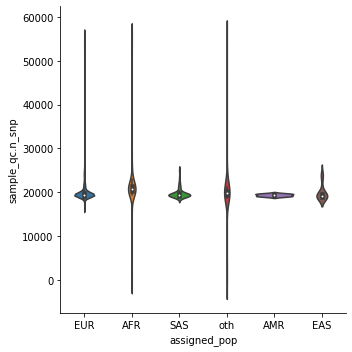

In [19]:
vio = sns.catplot(x="assigned_pop", y="sample_qc.n_snp",
            kind="violin",
            data=df)
plotfile = plot_dir + "sample_qc/n_snp_violin.png"
vio.figure.savefig(plotfile)

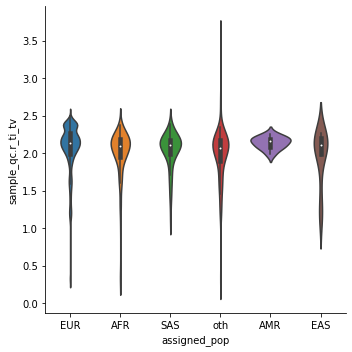

In [21]:
vio = sns.catplot(x="assigned_pop", y="sample_qc.r_ti_tv",
            kind="violin",
            data=df)

plotfile = plot_dir + "sample_qc/ti_tv_violin.png"
vio.figure.savefig(plotfile)

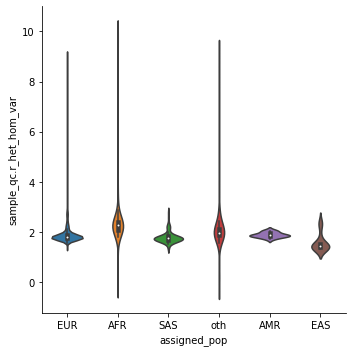

In [22]:
vio = sns.catplot(x="assigned_pop", y="sample_qc.r_het_hom_var",
            kind="violin",
            data=df)
plotfile = plot_dir + "sample_qc/het_hom_violin.png"
vio.figure.savefig(plotfile)

In [2]:
#scatter plots of each possible pair of the metrics tested in sample QC, coloured by number of metrics that sample fails on
tmp_file = "/lustre/scratch123/qc//plots/sample_qc/tmp.html"#temp file for plots

mtdir = "file:///lustre/scratch123/qc/matrixtables/"
htfile = mtdir + "mt_pops_QC_filters.ht"
ht = hl.read_table(htfile)
#annotate with number of fails as a string
ht = ht.annotate(filter_fail_count=(hl.len(ht.qc_metrics_filters) - 2))

fail_count_expr = (hl.case()
                   .when(ht.filter_fail_count == 0, '0')
                   .when(ht.filter_fail_count == 1, '1')
                   .when(ht.filter_fail_count == 2, '2')
                   .when(ht.filter_fail_count == 3, '3')
                   .when(ht.filter_fail_count == 4, '4')
                   .default("")
                  )
ht = ht.annotate(filter_fail_count_str = fail_count_expr).key_by('s')

In [4]:
p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.heterozygosity_rate, xlabel='nSNP', ylabel='Heterozygosity Rate', label=ht.filter_fail_count_str, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/hetr_nsnp.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [5]:
p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_het_hom_var, xlabel='nSNP', ylabel='Het/Hom ratio', label=ht.filter_fail_count_str, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/hethom_nsnp.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [6]:
p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht.filter_fail_count_str, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/titv_nsnp.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [7]:
p = hl.plot.scatter(ht.sample_qc.r_het_hom_var, ht.sample_qc.heterozygosity_rate, xlabel='Het/hom ratio', ylabel='Heterozygosity Rate', label=ht.filter_fail_count_str, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/hethom_hetr.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [8]:
p = hl.plot.scatter(ht.sample_qc.r_ti_tv, ht.sample_qc.heterozygosity_rate, xlabel='Ti/Tv ratio', ylabel='Heterozygosity Rate', label=ht.filter_fail_count_str, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/titv_hetr.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [9]:
p = hl.plot.scatter(ht.sample_qc.r_het_hom_var, ht.sample_qc.r_ti_tv, xlabel='Het/hom ratio', ylabel='Ti/Tv ratio', label=ht.filter_fail_count_str, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/titv_hethom.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [2]:
#try the same plots for unfiltered data
mtdir = "file:///lustre/scratch123/qc/matrixtables/"
htfile = mtdir + "non_stratified_sample_qc_cols.ht"
ht = hl.read_table(htfile)



In [3]:
fail_count_expr = (hl.case()
                   .when(ht.filter_fail_count == 0, '0')
                   .when(ht.filter_fail_count == 1, '1')
                   .when(ht.filter_fail_count == 2, '2')
                   .when(ht.filter_fail_count == 3, '3')
                   .when(ht.filter_fail_count == 4, '4')
                   .default("")
                  )
ht = ht.annotate(filter_fail_count_str = fail_count_expr).key_by('s')

In [6]:
p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_het_hom_var, xlabel='nSNP', ylabel='Het/hom ratio', label=ht.filter_fail_count_str, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/nsnp_hethom_unfiltered.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [7]:
p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='TiTv ratio', label=ht.filter_fail_count_str, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/nsnp_titv_unfiltered.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [8]:
p = hl.plot.scatter(ht.sample_qc.r_het_hom_var, ht.sample_qc.r_ti_tv, xlabel='Het/hom ratio', ylabel='TiTv ratio', label=ht.filter_fail_count_str, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/hethom_titv_unfiltered.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [3]:
#make customised violin plots with bars at +/- 4 MAD
#load in data
ht_sample_qc_file = lustre_dir + "matrixtables/mt_pops_sampleqc.ht"
htqc = hl.read_table(ht_sample_qc_file)
htqc.show()

+-------------------+----------+----------+-----------+--------------+
| s                 | callrate |   f_stat | is_female | assigned_pop |
+-------------------+----------+----------+-----------+--------------+
| str               |  float64 |  float64 |      bool | str          |
+-------------------+----------+----------+-----------+--------------+
| "EGAN00003143328" | 1.00e+00 | 8.30e-01 |     False | "EUR"        |
| "EGAN00003143329" | 1.00e+00 | 8.26e-01 |     False | "EUR"        |
| "EGAN00003143330" | 1.00e+00 | 8.75e-01 |     False | "AFR"        |
| "EGAN00003143331" | 1.00e+00 | 8.39e-01 |     False | "EUR"        |
| "EGAN00003143334" | 1.00e+00 | 8.51e-01 |     False | "EUR"        |
| "EGAN00003143336" | 1.00e+00 | 8.81e-01 |     False | "EUR"        |
| "EGAN00003143337" | 1.00e+00 | 8.57e-01 |     False | "EUR"        |
| "EGAN00003143338" | 1.00e+00 | 8.20e-01 |     False | "EUR"        |
| "EGAN00003143339" | 1.00e+00 | 8.71e-01 |     False | "EUR"        |
| "EGAN00003143340" | 1.00e+00 | 8.57e-01 |     False | "EUR"        |
+-------------------+----------+----------+-----------+--------------+

+---------------------+--------------------+------------------------+
| sample_qc.call_rate | sample_qc.n_called | sample_qc.n_not_called |
+---------------------+--------------------+------------------------+
|             float64 |              int64 |                  int64 |
+---------------------+--------------------+------------------------+
|            1.00e+00 |             552164 |                      8 |
|            1.00e+00 |             552167 |                      5 |
|            1.00e+00 |             552169 |                      3 |
|            1.00e+00 |             552170 |                      2 |
|            1.00e+00 |             552168 |                      4 |
|            1.00e+00 |             552166 |                      6 |
|            1.00e+00 |             552172 |                      0 |
|            1.00e+00 |             552167 |                      5 |
|            1.00e+00 |             552169 |                      3 |
|            1.00e+00 |             552171 |                      1 |
+---------------------+--------------------+------------------------+

+----------------------+---------------------+-----------------+
| sample_qc.n_filtered | sample_qc.n_hom_ref | sample_qc.n_het |
+----------------------+---------------------+-----------------+
|                int64 |               int64 |           int64 |
+----------------------+---------------------+-----------------+
|                    0 |              535825 |           11111 |
|                    0 |              535303 |           11701 |
|                    0 |              534327 |           12536 |
|                    0 |              535491 |           11499 |
|                    0 |              535424 |           11588 |
|                    0 |              535584 |           11499 |
|                    0 |              536251 |           10806 |
|                    0 |              535534 |           11525 |
|                    0 |              535983 |           11019 |
|                    0 |              535620 |           11390 |
+----------------------+---------------------+-----------------+

+---------------------+---------------------+-----------------------+
| sample_qc.n_hom_var | sample_qc.n_non_ref | sample_qc.n_singleton |
+---------------------+---------------------+-----------------------+
|               int64 |               int64 |                 int64 |
+---------------------+---------------------+-----------------------+
|                5228 |               16339 |                     0 |
|                5163 |               16864 |                     0 |
|                5306 |               17842 |                     0 |
|                5180 |               16679 |                     0 |
|                5156 |               16744 |                     0 |
|

In [4]:
#create subset for each assigned pop, and convert each to a pandas dataframe
AFRht = htqc.filter(htqc.assigned_pop == 'AFR')
AMRht = htqc.filter(htqc.assigned_pop == 'AMR')
EURht = htqc.filter(htqc.assigned_pop == 'EUR')
EASht = htqc.filter(htqc.assigned_pop == 'EAS')
SASht = htqc.filter(htqc.assigned_pop == 'SAS')
othht = htqc.filter(htqc.assigned_pop == 'oth')

AFR_df = AFRht.to_pandas(flatten=True)
AMR_df = AMRht.to_pandas(flatten=True)
EUR_df = EURht.to_pandas(flatten=True)
EAS_df = EASht.to_pandas(flatten=True)
SAS_df = SASht.to_pandas(flatten=True)
oth_df = othht.to_pandas(flatten=True)

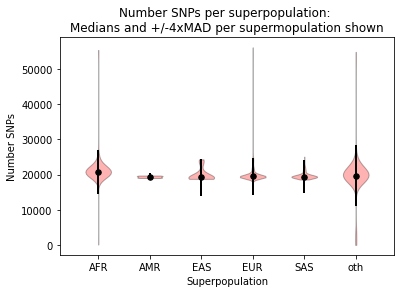

In [6]:
import numpy as np

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Superpopulation')
    
#plots for nSNPs
metric = 'sample_qc.n_snp'
m1 = AFR_df[metric].median()
m2 = AMR_df[metric].median()
m3 = EAS_df[metric].median()
m4 = EUR_df[metric].median()
m5 = SAS_df[metric].median()
m6 = oth_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6])
q1 = np.array([m1-(4*AFR_df.mad()[metric]), m2-(4*AMR_df.mad()[metric]), m3-(4*EAS_df.mad()[metric]), m4-(4*EAS_df.mad()[metric]), m5-(4*EUR_df.mad()[metric]), m6-(4*oth_df.mad()[metric])])
q2 = np.array([m1+(4*AFR_df.mad()[metric]), m2+(4*AMR_df.mad()[metric]), m3+(4*EAS_df.mad()[metric]), m4+(4*EAS_df.mad()[metric]), m5+(4*EUR_df.mad()[metric]), m6+(4*oth_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Number SNPs per superpopulation: \nMedians and +/-4xMAD per supermopulation shown')
ax.set_ylabel('Number SNPs')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + '/sample_qc/nSNP_violin_with_4MAD.png'
plt.savefig(plotfile, dpi=100)

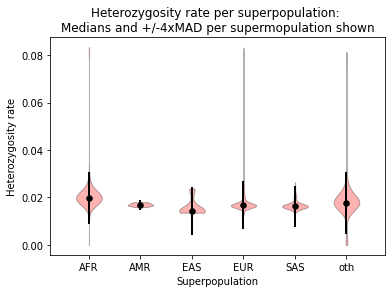

In [7]:
#plots for het rate
metric = 'sample_qc.heterozygosity_rate'
m1 = AFR_df[metric].median()
m2 = AMR_df[metric].median()
m3 = EAS_df[metric].median()
m4 = EUR_df[metric].median()
m5 = SAS_df[metric].median()
m6 = oth_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6])
q1 = np.array([m1-(4*AFR_df.mad()[metric]), m2-(4*AMR_df.mad()[metric]), m3-(4*EAS_df.mad()[metric]), m4-(4*EAS_df.mad()[metric]), m5-(4*EUR_df.mad()[metric]), m6-(4*oth_df.mad()[metric])])
q2 = np.array([m1+(4*AFR_df.mad()[metric]), m2+(4*AMR_df.mad()[metric]), m3+(4*EAS_df.mad()[metric]), m4+(4*EAS_df.mad()[metric]), m5+(4*EUR_df.mad()[metric]), m6+(4*oth_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Heterozygosity rate per superpopulation: \nMedians and +/-4xMAD per supermopulation shown')
ax.set_ylabel('Heterozygosity rate')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + '/sample_qc/rHet_violin_with_4MAD.png'
plt.savefig(plotfile, dpi=100)

/home/ubuntu/venv/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


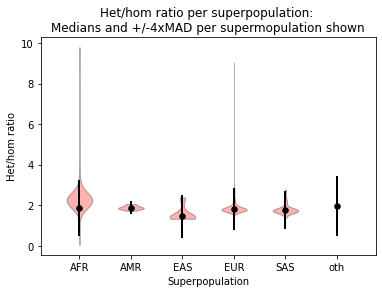

In [8]:
#plots for het hom ratio
metric = 'sample_qc.r_het_hom_var'
m1 = float(str(AMR_df[metric].median()).strip())
m2 = float(str(AMR_df[metric].median()).strip())
m3 = float(str(EAS_df[metric].median()).strip())
m4 = float(str(EUR_df[metric].median()).strip())
m5 = float(str(SAS_df[metric].median()).strip())
m6 = float(str(oth_df[metric].median()).strip())
meds = np.array([m1, m2, m3, m4, m5, m6])
q1 = np.array([m1-(4*AFR_df.mad()[metric]), m2-(4*AMR_df.mad()[metric]), m3-(4*EAS_df.mad()[metric]), m4-(4*EAS_df.mad()[metric]), m5-(4*EUR_df.mad()[metric]), m6-(4*oth_df.mad()[metric])])
q2 = np.array([m1+(4*AFR_df.mad()[metric]), m2+(4*AMR_df.mad()[metric]), m3+(4*EAS_df.mad()[metric]), m4+(4*EAS_df.mad()[metric]), m5+(4*EUR_df.mad()[metric]), m6+(4*oth_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Het/hom ratio per superpopulation: \nMedians and +/-4xMAD per supermopulation shown')
ax.set_ylabel('Het/hom ratio')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + '/sample_qc/HetHom_violin_with_4MAD.png'
plt.savefig(plotfile, dpi=100)

/home/ubuntu/venv/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


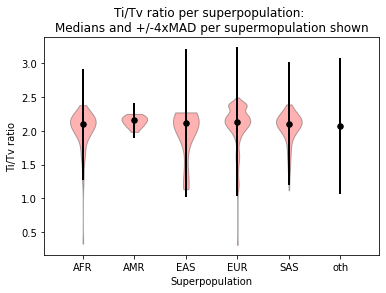

In [9]:
#plots for titv ratio
metric = 'sample_qc.r_ti_tv'
m1 = AFR_df[metric].median()
m2 = AMR_df[metric].median()
m3 = EAS_df[metric].median()
m4 = EUR_df[metric].median()
m5 = SAS_df[metric].median()
m6 = oth_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6])
q1 = np.array([m1-(4*AFR_df.mad()[metric]), m2-(4*AMR_df.mad()[metric]), m3-(4*EAS_df.mad()[metric]), m4-(4*EAS_df.mad()[metric]), m5-(4*EUR_df.mad()[metric]), m6-(4*oth_df.mad()[metric])])
q2 = np.array([m1+(4*AFR_df.mad()[metric]), m2+(4*AMR_df.mad()[metric]), m3+(4*EAS_df.mad()[metric]), m4+(4*EAS_df.mad()[metric]), m5+(4*EUR_df.mad()[metric]), m6+(4*oth_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Ti/Tv ratio per superpopulation: \nMedians and +/-4xMAD per supermopulation shown')
ax.set_ylabel('Ti/Tv ratio')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + '/sample_qc/TiTv_violin_with_4MAD.png'
plt.savefig(plotfile, dpi=100)